# Preprocessing countries

In [2]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import copy

In [3]:
df = pd.read_csv("test_users.csv")
df_origin = copy.deepcopy(df)
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [6]:
df.describe()

/Users/guillaume_j/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,timestamp_first_active,date_first_booking,age,signup_flow
count,6.209600e+04,0.0,33220.000000,62096.000000
mean,2.014081e+13,NaN,37.616677,7.813885
std,8.024585e+07,NaN,74.440647,11.254291
min,2.014070e+13,NaN,1.000000,0.000000
25%,2.014072e+13,NaN,NaN,0.000000
50%,2.014081e+13,NaN,NaN,0.000000
75%,2.014091e+13,NaN,NaN,23.000000
max,2.014093e+13,NaN,2002.000000,25.000000


# 1. Evaluating the consistency of the dataset

Are there missing values in the data ?

In [7]:
df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
dtype: bool

**Hence, there are missing values in the columns : **

* date_first_booking : users that never booked an airbnb apartment
* gender : users that didn't wish to specify their gender
* age : to be evaluated
* first_affiliate_tracked : to be evaluated

# 2. Cleaning age 

Ages are represented in two ways in the dataset, some data represent the age and some oters represent the date of birth. 

Also, many irrelevant ages are present or inexistant.

For the relevancy of the data we will only keep users between the age of 15 and 90 years old, and those who specified their age.

A first step is to include users having 2016-age belonging to [15,90] (users that mistook their age with date of birth)
Then the data will be cleaned to remove all users not in the span **[15,90]**, and those **who didn't specify their age**.


In [9]:
#Finding users who put their birthdate instead of age in original dataframe
df_birthyear = df[(df['age']>=1926) & (df['age']<=2001)]

#Converting to age
df_birthyear = copy.deepcopy(df_birthyear)
df_birthyear['age'] = 2016-df_birthyear['age']

#Replacing in original dataframe
df.loc[(df['age']>=1926) & (df['age']<=2001), 'age'] = df_birthyear

#Assigning a -1 value to invalid ages
df = copy.deepcopy(df)
df.loc[((df['age']<15) | (df['age']>90)), 'age'] = -1

#Counting invalid ages
OutOfBoundsAgePercentage = round(100*len(df.loc[(df['age'] == -1), 'age'])/len(df),2)
print('Percentage of users with irrelevant age',OutOfBoundsAgePercentage,'%')

Percentage of users with irrelevant age 0.56 %


When cleaning the test_users files, we still need to keep users with invalid entries as they still book destinations.

In [6]:
 # No more deleting of id

Plot results

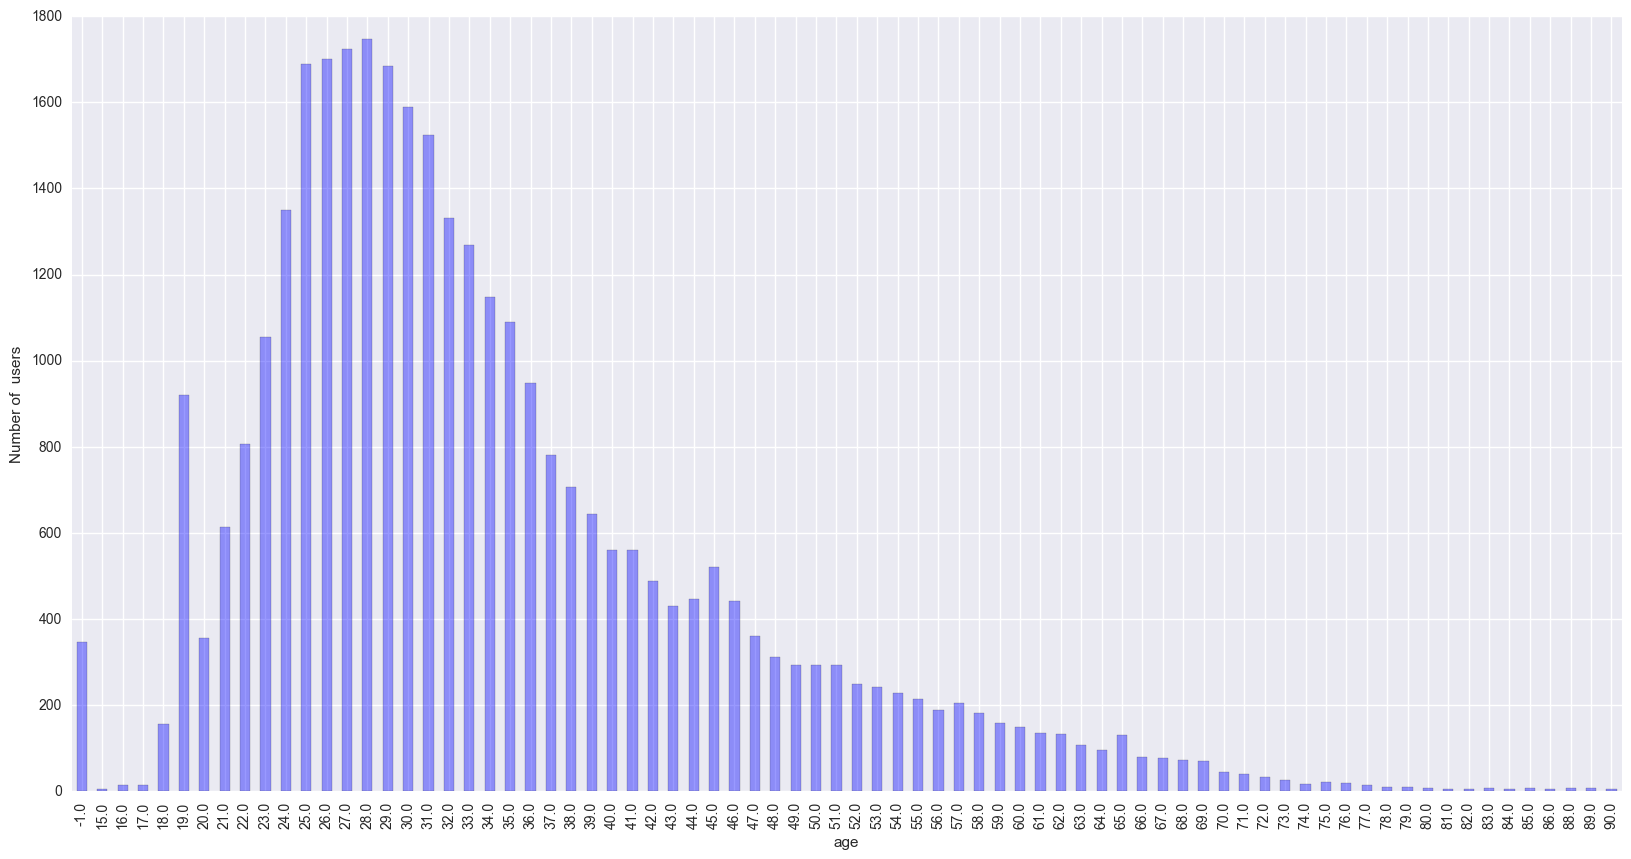

In [10]:
df.id.groupby(df.age).count().plot(kind='bar', alpha=0.4, color='b',figsize=(20,10))
plt.ylabel('Number of  users')
plt.show()

### Checking NaN values

In [13]:
df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
dtype: bool

# 3. Cleaning the gender feature

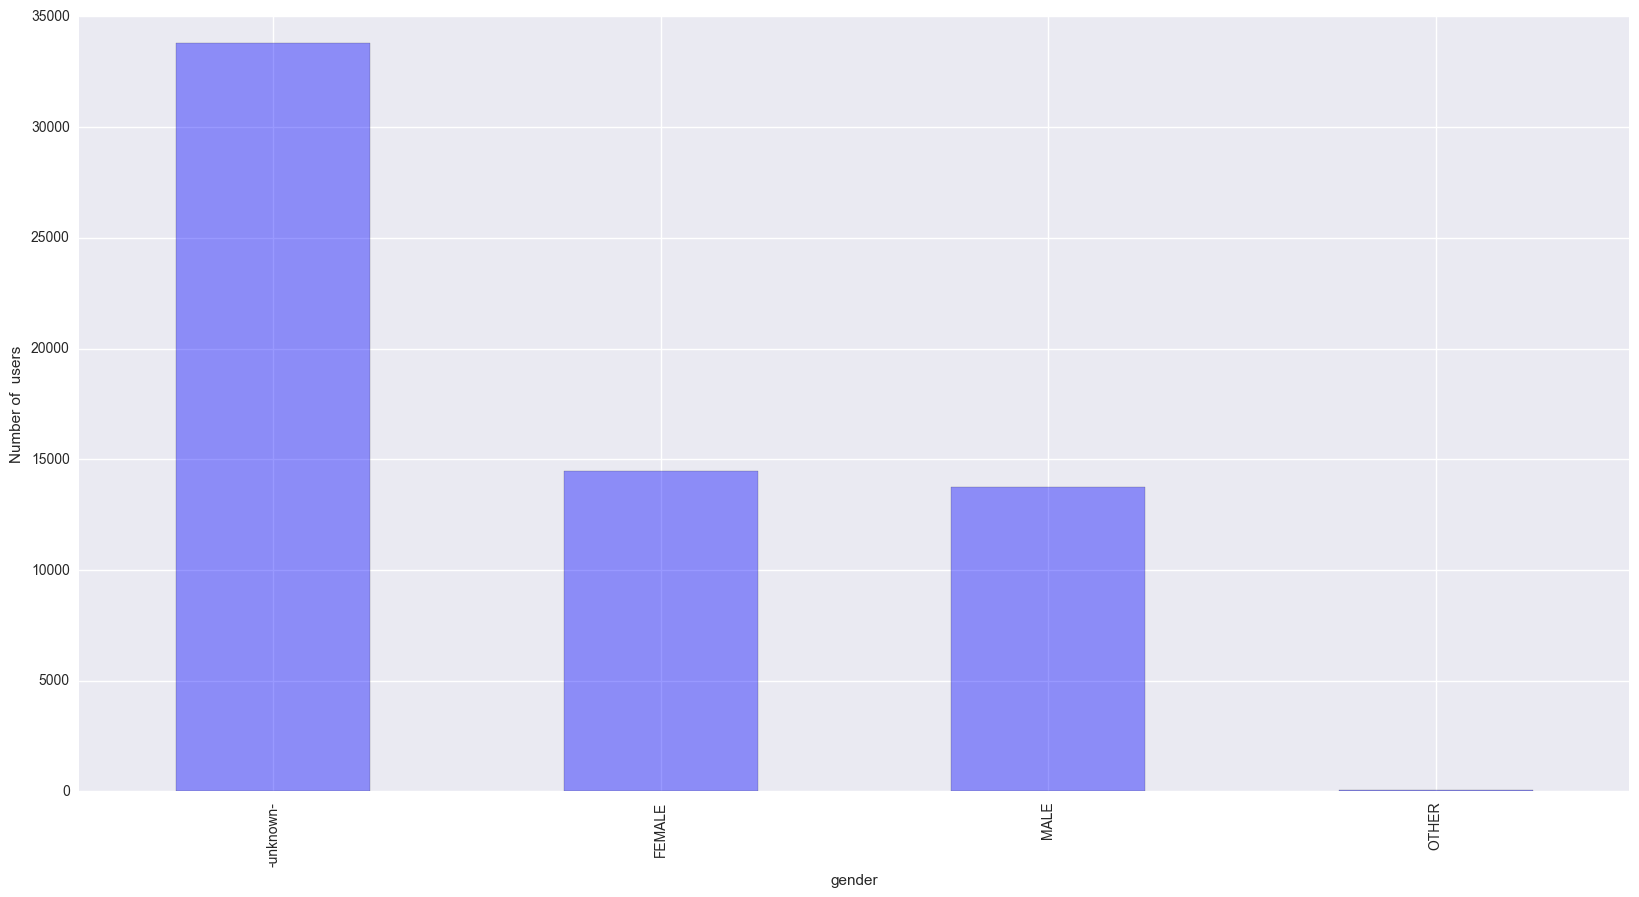

In [14]:
df.id.groupby(df.gender).count().plot(kind='bar', alpha=0.4, color='b',figsize=(20,10))
plt.ylabel('Number of  users')
plt.show()

In [15]:
print(df.gender.value_counts())

-unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: gender, dtype: int64


We merge the categories unknown and other into unknown

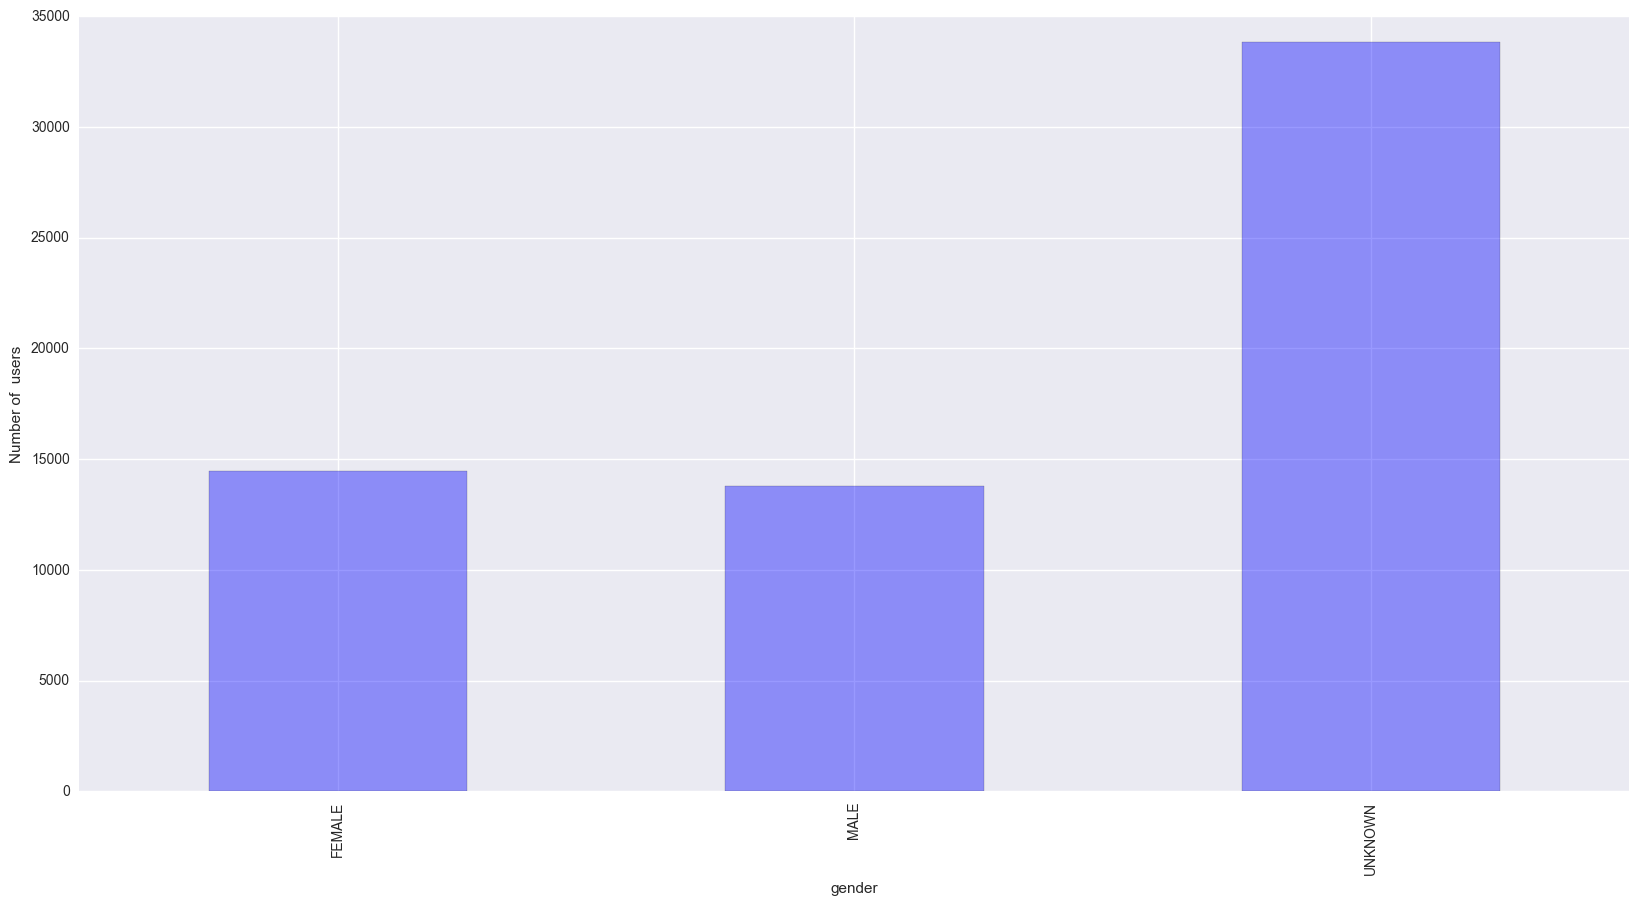

In [16]:
df.loc[df['gender']=='-unknown-', 'gender'] = 'UNKNOWN'
df.loc[df['gender']=='OTHER', 'gender'] = 'UNKNOWN'
df.id.groupby(df.gender).count().plot(kind='bar', alpha=0.4, color='b',figsize=(20,10))
plt.ylabel('Number of  users')
plt.show()

# 4. Cleaning the first_affiliate_tracked feature

This columns represents "whats the first marketing the user interacted with before the signing up", see DATA.md

In [17]:
print(df.first_affiliate_tracked.value_counts())

untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
Name: first_affiliate_tracked, dtype: int64


There are NaN values. These NaN values will be merge into the untracked category.

In [18]:
df.loc[df['first_affiliate_tracked'].isnull(), 'first_affiliate_tracked'] = 'untracked'

Plot first_affiliate_tracked

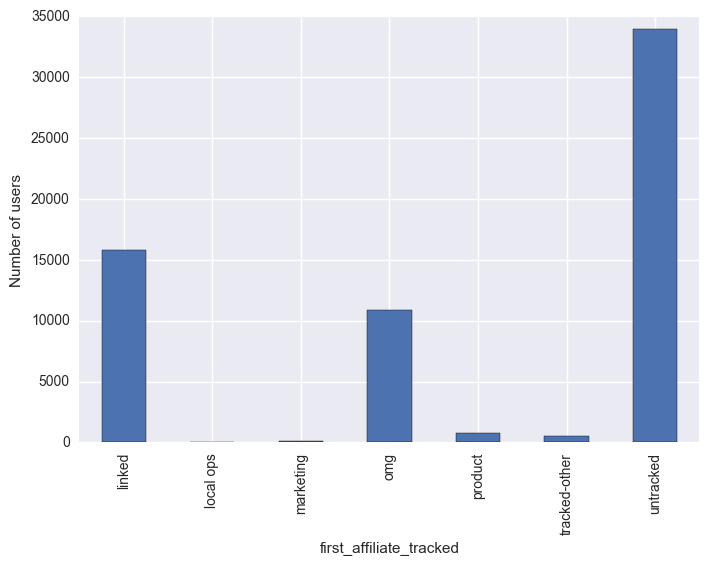

In [19]:
df.id.groupby(df.first_affiliate_tracked).count().plot(kind="bar")
plt.ylabel('Number of users')

### Checking NaN values

In [20]:
df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked    False
signup_app                 False
first_device_type          False
first_browser              False
dtype: bool

# 5. Language

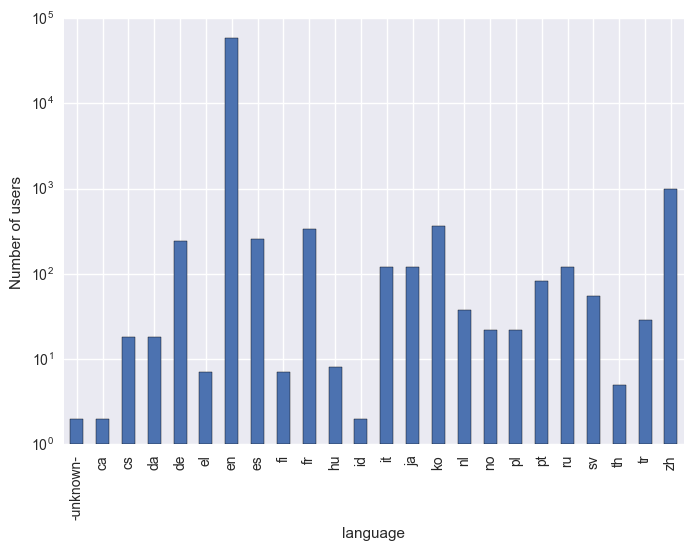

In [28]:
df.id.groupby(df.language).count().plot(kind="bar",log=True)
plt.ylabel('Number of users')

In [29]:
print(df.language.value_counts())

en           59224
zh            1002
ko             369
fr             336
es             259
de             245
ja             120
it             119
ru             119
pt              82
sv              54
nl              37
tr              28
pl              21
no              21
cs              17
da              17
hu               7
fi               6
el               6
th               4
id               1
ca               1
-unknown-        1
Name: language, dtype: int64


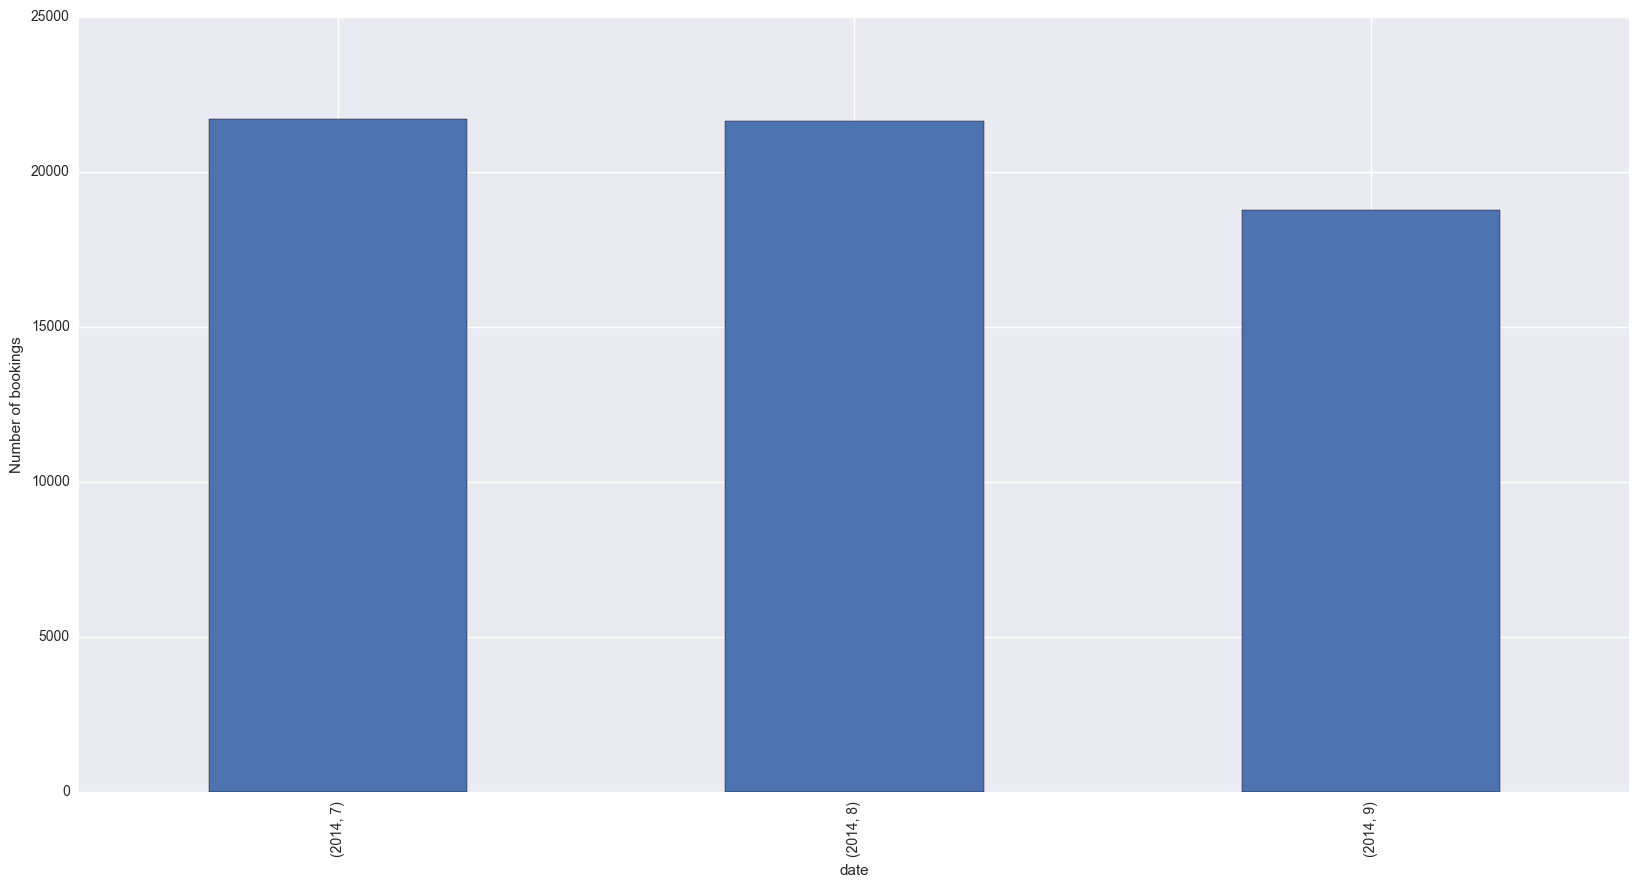

In [32]:
df.id.groupby([df.date_account_created.dt.year, df.date_account_created.dt.month]).count().plot(kind="bar",figsize=(20,10))
plt.xlabel('date')
plt.ylabel('Number of bookings')

Percentage of non bookers is 100.0 % (we would like to predict it) \\
Looking at the date where the account is not relevant in the sense that we would like to predict future bookings. All the accounts creation were made within 3 months.

# 8. Save cleaned data frame to a csv file

In [34]:
df.to_csv('test_users_cleaned.csv')
